In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from atusfunclib import load_data, group_filter_average
from activitylib import ACTINFO
from wlmetrics import *

In [4]:
# Import all data
data_import = load_data(loc='data')

In [14]:
# Unpack individual dataframes
df, dfactcodes, dfeducodes, dfinccodes, dfagecodes, \
dfempcodes, dfindcodes, dfraccodes, dfloccodes, dfwhocodes, \
dfdemocodes = data_import

In [15]:
# Convert category columns to float
df['TEAGE_CAT'] = df['TEAGE_CAT'].astype(float)
df['TRERNWA_CAT'] = df['TRERNWA_CAT'].astype(float)

In [17]:
# Calculate metrics
weights_p = np.array([1.0, 0.2, 1.0, 0.6, 0.6, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.2])
weights_n = np.array([0.0, 1.0, 0.8, 1.0])

df['metric1'] = w_l_balance_weighted_ratio(df, ACTINFO['positiveWL'], ACTINFO['negoccWL'],
                                           weights_p, weights_n, N=1)

df['metric2'] = w_l_balance_workday(df, workid='0501', hours=10)
df['metric3'] = w_l_balance_personalcare(df)
df['metric4'] = w_l_balance_leisuresocial(df)
df['metric5'] = w_l_balance_housework(df, hours=3)

In [18]:
# Get filtered, grouped and averaged data for continuous
df_mean_edu, df_byedu, df_mean_byedu = group_filter_average(df, 'PEEDUCA', 'TEAGE', 18, weights='TUFNWGTP')
df_mean_age, df_byage, df_mean_byage = group_filter_average(df, 'TEAGE_CAT', 'TEAGE', 18, weights='TUFNWGTP')
df_mean_inc, df_byinc, df_mean_byinc = group_filter_average(df, 'TRERNWA_CAT', 'TEAGE', 18, weights='TUFNWGTP')

In [19]:
# Free memory
try:
    del df
except NameError:
    print "df already deleted"

In [20]:
# Metrics for W-L balance
df_byage.agg({'metric1': np.mean,
              'metric2': np.mean,
              'metric3': np.mean,
              'metric4': np.mean,
              'metric5': np.mean})

,metric3,metric2,metric1,metric5,metric4
TEAGE_CAT,,,,,
1.0,0.459515,0.042501,4.433510,0.173557,0.217967
2.0,0.443518,0.070872,3.944852,0.318650,0.186796
3.0,0.435605,0.072311,3.933685,0.370016,0.180531
4.0,0.430987,0.074322,3.810546,0.356880,0.179580
5.0,0.431317,0.080377,3.787718,0.304529,0.186970
6.0,0.430775,0.078369,3.801693,0.237870,0.201536
7.0,0.432884,0.071232,4.121037,0.186163,0.225202
8.0,0.446370,0.026767,5.556634,0.198419,0.280681
9.0,0.465376,0.004176,6.649634,0.210440,0.326293


/opt/conda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


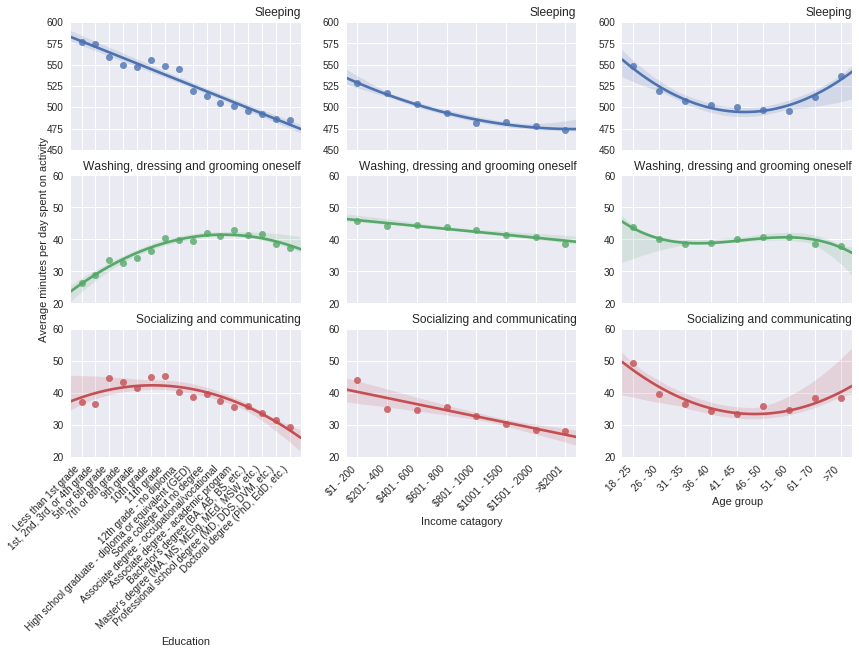

In [23]:
# Polynomial Regression Plot 1 - Activity times
sns.set_color_codes("deep")
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3,
                                                                        sharex='col',
                                                                        figsize=(14, 8))

sns.regplot(x='PEEDUCA', y='t010101_W', data=df_mean_byedu.reset_index(), order=1, ax=ax1, color='b')
sns.regplot(x='TRERNWA_CAT', y='t010101_W', data=df_mean_byinc.reset_index(), order=2, ax=ax2, color='b')
sns.regplot(x='TEAGE_CAT', y='t010101_W', data=df_mean_byage.reset_index(), order=2, ax=ax3, color='b')
sns.regplot(x='PEEDUCA', y='t0102_W', data=df_mean_byedu.reset_index(), order=2, ax=ax4, color='g')
sns.regplot(x='TRERNWA_CAT', y='t0102_W', data=df_mean_byinc.reset_index(), order=1, ax=ax5, color='g')
sns.regplot(x='TEAGE_CAT', y='t0102_W', data=df_mean_byage.reset_index(), order=3, ax=ax6, color='g')
sns.regplot(x='PEEDUCA', y='t1201_W', data=df_mean_byedu.reset_index(), order=2, ax=ax7, color='r')
sns.regplot(x='TRERNWA_CAT', y='t1201_W', data=df_mean_byinc.reset_index(), order=1, ax=ax8, color='r')
sns.regplot(x='TEAGE_CAT', y='t1201_W', data=df_mean_byage.reset_index(), order=2, ax=ax9, color='r')

ax1.set(ylim=[450,600], ylabel='', xlabel='')
ax2.set(ylim=[450,600], ylabel='', xlabel='')
ax3.set(ylim=[450,600], ylabel='', xlabel='')
ax1.set_title('Sleeping', loc='right')
ax2.set_title('Sleeping', loc='right')
ax3.set_title('Sleeping', loc='right')

ax4.set(ylim=[20,60], ylabel='Average minutes per day spent on activity', xlabel='')
ax5.set(ylim=[20,60], ylabel='', xlabel='')
ax6.set(ylim=[20,60], ylabel='', xlabel='')

ax4.set_title('Washing, dressing and grooming oneself', loc='right')
ax5.set_title('Washing, dressing and grooming oneself', loc='right')
ax6.set_title('Washing, dressing and grooming oneself', loc='right')

ax7.set(ylim=[20,60], ylabel='', xlabel='Education', xticks=range(31,47))
ax8.set(ylim=[20,60], ylabel='', xlabel='Income catagory', xticks=range(1,9))
ax9.set(ylim=[20,60], ylabel='', xlabel='Age group', xticks=range(1,10))
ax7.set_xticklabels(dfeducodes.NAME.values,
                  rotation=45,
                  ha='right')
ax8.set_xticklabels(dfinccodes.NAME.values,
                  rotation=45,
                  ha='right')
ax9.set_xticklabels(dfagecodes.NAME.values[1:],
                  rotation=45,
                  ha='right')
ax7.set_title('Socializing and communicating', loc='right')
ax8.set_title('Socializing and communicating', loc='right')
ax9.set_title('Socializing and communicating', loc='right')

#plt.savefig('fig06.svg', bbox_inches='tight')

plt.show()

/opt/conda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


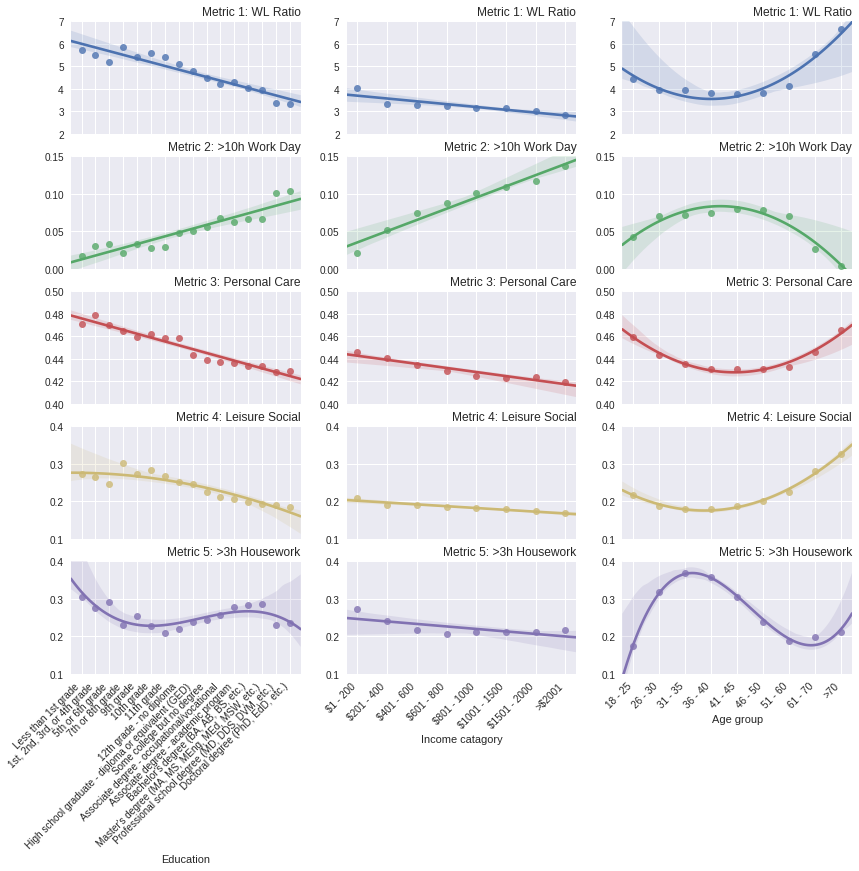

In [24]:
# Polynomial Regression Plot 2 - Work Life Metrics
sns.set_color_codes("deep")
fig, ax = plt.subplots(nrows=5, ncols=3,
                       sharex='col',
                       figsize=(14, 12))

sns.regplot(x='PEEDUCA',     y='metric1', data=df_mean_byedu.reset_index(), order=1, ax=ax[0][0], color='b')
sns.regplot(x='TRERNWA_CAT', y='metric1', data=df_mean_byinc.reset_index(), order=1, ax=ax[0][1], color='b')
sns.regplot(x='TEAGE_CAT',   y='metric1', data=df_mean_byage.reset_index(), order=2, ax=ax[0][2], color='b')
sns.regplot(x='PEEDUCA',     y='metric2', data=df_mean_byedu.reset_index(), order=1, ax=ax[1][0], color='g')
sns.regplot(x='TRERNWA_CAT', y='metric2', data=df_mean_byinc.reset_index(), order=1, ax=ax[1][1], color='g')
sns.regplot(x='TEAGE_CAT',   y='metric2', data=df_mean_byage.reset_index(), order=2, ax=ax[1][2], color='g')
sns.regplot(x='PEEDUCA',     y='metric3', data=df_mean_byedu.reset_index(), order=1, ax=ax[2][0], color='r')
sns.regplot(x='TRERNWA_CAT', y='metric3', data=df_mean_byinc.reset_index(), order=1, ax=ax[2][1], color='r')
sns.regplot(x='TEAGE_CAT',   y='metric3', data=df_mean_byage.reset_index(), order=2, ax=ax[2][2], color='r')
sns.regplot(x='PEEDUCA',     y='metric4', data=df_mean_byedu.reset_index(), order=2, ax=ax[3][0], color='y')
sns.regplot(x='TRERNWA_CAT', y='metric4', data=df_mean_byinc.reset_index(), order=1, ax=ax[3][1], color='y')
sns.regplot(x='TEAGE_CAT',   y='metric4', data=df_mean_byage.reset_index(), order=2, ax=ax[3][2], color='y')
sns.regplot(x='PEEDUCA',     y='metric5', data=df_mean_byedu.reset_index(), order=3, ax=ax[4][0], color='m')
sns.regplot(x='TRERNWA_CAT', y='metric5', data=df_mean_byinc.reset_index(), order=1, ax=ax[4][1], color='m')
sns.regplot(x='TEAGE_CAT',   y='metric5', data=df_mean_byage.reset_index(), order=3, ax=ax[4][2], color='m')

for i in xrange(3):
    ax[0][i].set(ylim=[2,7], ylabel='', xlabel='')
    ax[0][i].set_title('Metric 1: WL Ratio', loc='right')
    
    ax[1][i].set(ylim=[0,0.15], ylabel='', xlabel='')
    ax[1][i].set_title('Metric 2: >10h Work Day', loc='right')
    
    ax[2][i].set(ylim=[0.4,0.5], ylabel='', xlabel='')
    ax[2][i].set_title('Metric 3: Personal Care', loc='right')
    
    ax[3][i].set(ylim=[0.1,0.4], ylabel='', xlabel='')
    ax[3][i].set_title('Metric 4: Leisure Social', loc='right')
    
    ax[4][i].set(ylim=[0.1,0.4], ylabel='')
    ax[4][i].set_title('Metric 5: >3h Housework', loc='right')

ax[4][0].set(xlabel='Education', xticks=range(31,47))
ax[4][1].set(xlabel='Income catagory', xticks=range(1,9))
ax[4][2].set(xlabel='Age group', xticks=range(1,10))

ax[4][0].set_xticklabels(dfeducodes.NAME.values,
                         rotation=45,
                         ha='right')
ax[4][1].set_xticklabels(dfinccodes.NAME.values,
                         rotation=45,
                         ha='right')
ax[4][2].set_xticklabels(dfagecodes.NAME.values[1:],
                         rotation=45,
                         ha='right')

#plt.savefig('fig07.svg', bbox_inches='tight')

plt.show()